Partha Pratim Ray
Founder, Indian Knowledge Forum
parthapratimray1986@gmail.com

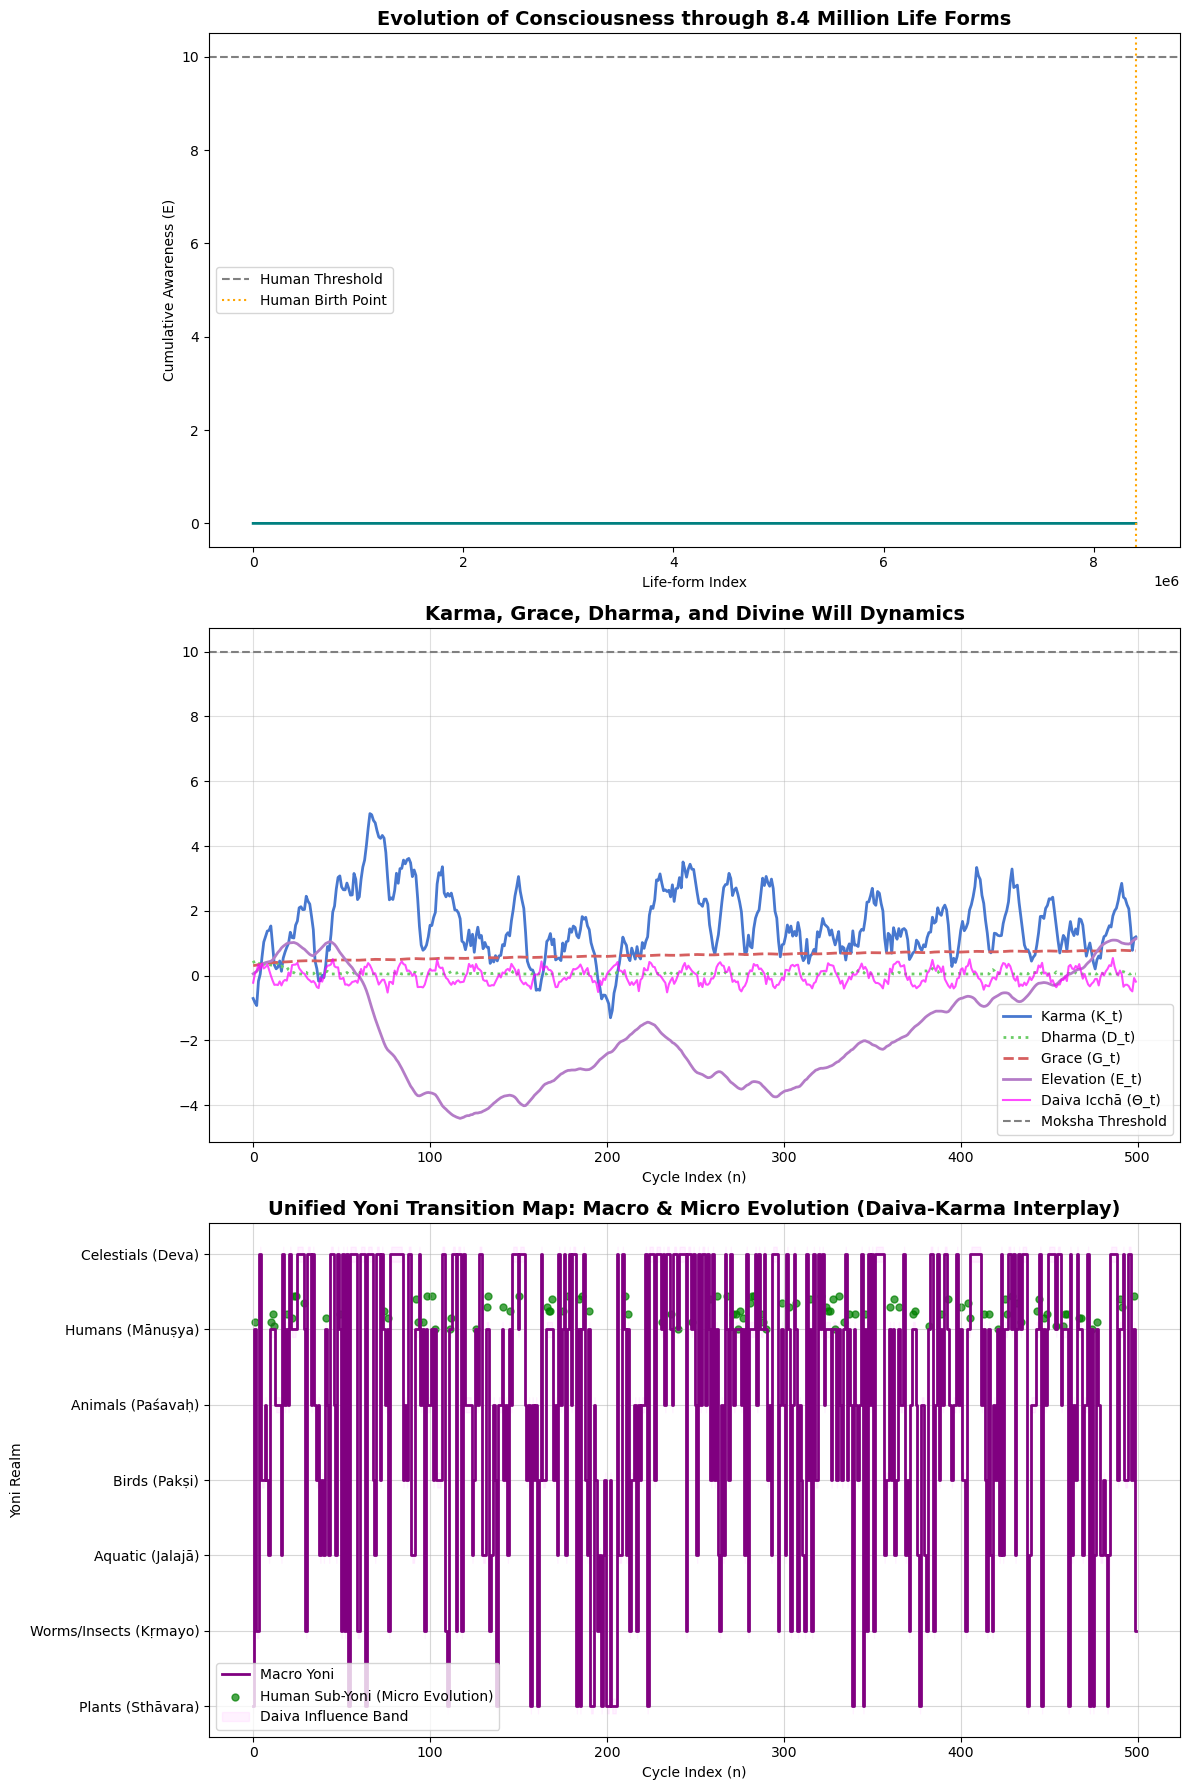


🕉️ FINAL SUMMARY
 - Total pre-human forms traversed   : 8,400,000
 - Human birth index (approx.)       : 8,399,999
 - Total simulated cycles            : 500
 - Final Karma                       : 1.196
 - Final Elevation                   : 1.138
 - Final Grace                       : 0.763
 - Final Dharma                      : 0.050
 - Final Divine Will influence       : -0.187
 - Current Yoni                      : Worms/Insects (Kṛmayo)


In [14]:
# ----------------------------------------------------------
# 🕉️ COSMIC KARMA MANAGEMENT MODEL WITH DAIVA ICCHĀ (DIVINE WILL)
# ----------------------------------------------------------
# Includes: 7 yonis, 10 human sub-levels, dharma, grace, karma,
# divine will modulation, and complete visualization.
# ----------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

# ==========================================================
# PARAMETERS
# ==========================================================
N_L = 8_400_000
N_H = 500
eta = 0.0000012
E_crit = 10
alpha, beta, gamma, delta, lam = 0.12, 0.05, 0.7, 0.25, 0.05
omega, f, sigma_theta = 0.3, 0.05, 0.1  # divine will parameters
np.random.seed(33)

# ==========================================================
# EVOLUTION BASELINE
# ==========================================================
i = np.arange(1, N_L + 1)
E_i = eta * np.log(1 + i)
human_index = np.argmax(E_i >= E_crit)
if human_index == 0 and E_i[-1] < E_crit:
    human_index = N_L - 1

# ==========================================================
# DEFINE YONIS
# ==========================================================
yonis = [
    ("Plants (Sthāvara)", 2_000_000, -0.8),
    ("Worms/Insects (Kṛmayo)", 1_100_000, -0.5),
    ("Aquatic (Jalajā)", 900_000, -0.3),
    ("Birds (Pakṣi)", 1_000_000, 0.2),
    ("Animals (Paśavaḥ)", 3_000_000, 0.5),
    ("Humans (Mānuṣya)", 400_000, 1.0),
    ("Celestials (Deva)", 10_000, 2.0)
]
yoni_names = [y[0] for y in yonis]
K_yoni = np.array([y[2] for y in yonis])

# Human sub-yonis (10 karmic bands)
human_subyonis = np.linspace(0.4, 1.2, 10)

def softmax(x):
    e = np.exp(x - np.max(x))
    return e / np.sum(e)

# ==========================================================
# INITIAL CONDITIONS
# ==========================================================
K_t = np.random.uniform(-0.4, 0.6)
E_t = E_i[human_index]
D_t, G_t = 0.5, 0.3
Θ_t = 0.0  # Divine influence

K_hist, D_hist, G_hist, E_hist, Θ_hist, Y_hist, H_hist = [], [], [], [], [], [], []

current_yoni, current_human_sub = 5, 4

# ==========================================================
# MAIN SIMULATION LOOP
# ==========================================================
for n in range(N_H):
    # --- Divine Will (Daiva Icchā) Oscillation ---
    Θ_t = omega * np.sin(2 * np.pi * f * n) + np.random.normal(0, sigma_theta)
    
    # --- Karma Evolution ---
    noise = np.random.normal(0, 0.25)
    K_t = K_t + alpha * (D_t + G_t) - beta * abs(K_t) + delta * np.sin(K_t * np.pi) + Θ_t + noise
    
    # --- Dharma, Grace, Elevation Updates ---
    D_t = np.clip(D_t + np.random.normal(0.02, 0.04) * np.sign(E_t - abs(K_t)), 0.05, 1.0)
    G_t = np.clip(G_t + 0.03 * D_t * (1 - G_t) + 0.01 * np.tanh(Θ_t), 0, 1)
    E_t = E_t + alpha * (D_t + G_t) - lam * abs(K_t)
    
    # --- Macro Yoni Transition ---
    prob = softmax(-abs(K_t - K_yoni))
    current_yoni = np.random.choice(len(yonis), p=prob)
    
    # --- Human Sub-Yoni Transitions ---
    if current_yoni == 5:
        prob_human = softmax(-abs(K_t - human_subyonis))
        current_human_sub = np.random.choice(len(human_subyonis), p=prob_human)
    else:
        current_human_sub = -1
    
    # Record history
    K_hist.append(K_t)
    D_hist.append(D_t)
    G_hist.append(G_t)
    E_hist.append(E_t)
    Θ_hist.append(Θ_t)
    Y_hist.append(current_yoni)
    H_hist.append(current_human_sub)
    
    # Dharma drift (life challenges)
    if n % 25 == 0 and n > 0:
        D_t -= np.random.uniform(0.1, 0.2)
    
    # Liberation condition
    if abs(K_t) < 0.05 and E_t >= 10 and np.random.rand() < 0.15:
        print(f"🌸 Moksha attained after {n+1} cycles.")
        break

# ==========================================================
# VISUALIZATION
# ==========================================================
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
plt.style.use('seaborn-v0_8-muted')

# --- PANEL 1: Evolution Curve ---
axs[0].plot(i, E_i, color='teal', linewidth=2)
axs[0].axhline(E_crit, color='gray', linestyle='--', label='Human Threshold')
axs[0].axvline(human_index, color='orange', linestyle=':', label='Human Birth Point')
axs[0].set_title("Evolution of Consciousness through 8.4 Million Life Forms", fontsize=14, fontweight='bold')
axs[0].legend()
axs[0].set_xlabel("Life-form Index")
axs[0].set_ylabel("Cumulative Awareness (E)")

# --- PANEL 2: Karma + Grace + Divine Will ---
axs[1].plot(K_hist, label='Karma (K_t)', linewidth=2)
axs[1].plot(D_hist, ':', label='Dharma (D_t)', linewidth=2)
axs[1].plot(G_hist, '--', label='Grace (G_t)', linewidth=2)
axs[1].plot(E_hist, label='Elevation (E_t)', linewidth=2)
axs[1].plot(Θ_hist, '-', color='magenta', alpha=0.7, label='Daiva Icchā (Θ_t)')
axs[1].axhline(10, color='gray', linestyle='--', label='Moksha Threshold')
axs[1].set_title("Karma, Grace, Dharma, and Divine Will Dynamics", fontsize=14, fontweight='bold')
axs[1].legend()
axs[1].set_xlabel("Cycle Index (n)")
axs[1].grid(alpha=0.4)

# --- PANEL 3: Unified Macro + Micro Yoni Map ---
axs[2].step(range(len(Y_hist)), Y_hist, color='purple', linewidth=2, where='mid', label='Macro Yoni')
axs[2].set_yticks(range(len(yonis)))
axs[2].set_yticklabels(yoni_names)
axs[2].set_title("Unified Yoni Transition Map: Macro & Micro Evolution (Daiva-Karma Interplay)", fontsize=14, fontweight='bold')
axs[2].set_xlabel("Cycle Index (n)")
axs[2].set_ylabel("Yoni Realm")
axs[2].grid(alpha=0.5)

# --- Overlay: Human Sub-Yoni Points ---
human_yoni_indices = [i for i, y in enumerate(Y_hist) if y == 5]               # where current yoni == Human
human_suby = [H_hist[i] for i in human_yoni_indices if H_hist[i] >= 0]        # valid sub-levels
axs[2].scatter(
    human_yoni_indices,
    [5 + h * 0.05 for h in human_suby],      # vertically offset micro points near Human level
    color='green', s=25, alpha=0.7, label='Human Sub-Yoni (Micro Evolution)'
)

# Optional gentle halo for divine influence visualization
axs[2].fill_between(
    range(len(Y_hist)),
    np.array(Y_hist) - 0.1,
    np.array(Y_hist) + 0.1,
    color='magenta', alpha=0.05, label='Daiva Influence Band'
)

axs[2].legend()


plt.tight_layout()
plt.show()

# ==========================================================
# SUMMARY RESULTS
# ==========================================================
final_state = yoni_names[Y_hist[-1]]
print("\n🕉️ FINAL SUMMARY")
print(f" - Total pre-human forms traversed   : {N_L:,}")
print(f" - Human birth index (approx.)       : {human_index:,}")
print(f" - Total simulated cycles            : {len(K_hist)}")
print(f" - Final Karma                       : {K_t:.3f}")
print(f" - Final Elevation                   : {E_t:.3f}")
print(f" - Final Grace                       : {G_t:.3f}")
print(f" - Final Dharma                      : {D_t:.3f}")
print(f" - Final Divine Will influence       : {Θ_t:.3f}")
print(f" - Current Yoni                      : {final_state}")
